# **Israel Elections Data Analysis - Lab 2**


In [1]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = True
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')

Running on CoLab


In [2]:
# First install tha needed packages using conda in the current Jupyter kernel
import sys
if not(run_in_colab):
  !conda install --yes --prefix {sys.prefix} numpy
  !conda install --yes --prefix {sys.prefix} pandas
  !conda install --yes --prefix {sys.prefix} matplotlib

# Alternatively, if your python wasn't installed using anaconda, we can use pip install: 
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib


In [3]:
# Import modules 

import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import os
import io
from matplotlib import pyplot as plt
import copy
#from scipy.stats.stats import pearsonr, spearmanr

%matplotlib inline

First, we need to mount our local drive to the colab network

In [4]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/Daniel Ohayon/PycharmProjects/Statistics Lab"  


Mounted at /content/drive


In [5]:
# Loading elections 2020 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving votes per ballot 2020.csv to votes per ballot 2020.csv
Saving votes per city 2020.csv to votes per city 2020.csv


In [6]:
import io

data_type = "city" # "ballot"  # city
if   run_in_colab:
    df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2020_raw = pd.read_csv(data_path + 'votes per ballot 2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of ballot
        df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2020 = df_2020[df_2020.columns[8:-1]] # removing "metadata" columns
    else:
        df_2020_raw = pd.read_csv(data_path + 'votes per city 2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of cities 
        df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2020 = df_2020[df_2020.columns[5:-1]] # removing "metadata" columns
# Dataset is now stored in a Pandas Dataframe

In [7]:
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:-1]] # removing "metadata" columns
df_2020

,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,13,0,554,0,0,0,0,0,1,0,0,0,0,0,1,1,4,0,1,0,0,0,8,2,0,0,0,0,2,2
אבו גוש,75,4,2157,0,0,0,5,0,0,5,1,0,1,0,0,5,280,0,0,0,3,2,123,0,2,0,0,1,4,14
אבו סנאן,92,6,4458,0,1,0,16,1,2,13,2,0,1,1,2,230,190,3,2,1,3,3,752,0,2,2,1,2,4,247
אבו עבדון שבט,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
אבו קורינאת שבט,9,0,1263,0,0,0,1,0,0,3,0,0,1,0,0,0,8,0,1,2,1,0,33,0,2,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקומה,5,5,0,0,0,0,163,0,0,0,0,0,0,0,0,1,161,1,0,0,2,1,63,0,0,0,0,0,0,12
תקוע,28,33,3,7,0,0,760,0,0,0,0,0,0,5,1,35,583,2,0,0,29,0,85,2,0,1,0,2,5,34
תראבין אצאנע שבט,0,0,43,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0


**Create a dictionary of the parties:**

In [8]:
party_names = {"פה" : "כחול לבן" , "מחל" : "הליכוד" , "ודעם" : "הרשימה המשותפת" , "שס" : "שס" ,
               "ג" : "יהדות התורה","אמת" : "העבודה גשר מרצ", "ל" : "ישראל ביתנו" ,  "טב" : "ימינה"  }

# **Q1.**

**A. a function that create a proportional scatter plot of 2 parties:**

In [9]:
def size_scatter_parties(df, party1, party2):     
    party_share1 = df[party1] / df['כשרים']         # find the partial share of each party in each city (make vectors)
    party_share2 = df[party2] / df["כשרים"]
    sizes = (df["כשרים"]/max(df["כשרים"])) *200        # standardize the size of the biggest city = 200
    plt.scatter(party_share1, party_share2, s = sizes)    # print(max(sizes)) #making sure the max size is 200, which appears to be true
    plt.xlabel(party_names[party1][::-1])           # axis labels as parties names
    plt.ylabel(party_names[party2][::-1])
    plt.title('Scatter for two parties with sizes')

df_2020_raw.drop(['מעטפות חיצוניות'],axis=0)                          # so this row won't be presented as a city
print(max(df_2020_raw["כשרים"]/max(df_2020_raw["כשרים"]) *200))     # making sure the max size is 200, which appears to be true


200.0


**B. Create the plot for each pair we selected:**

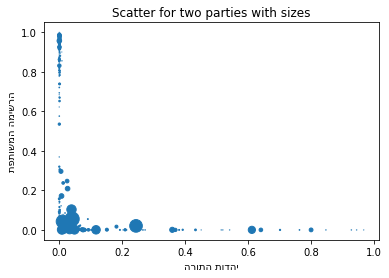

In [10]:
size_scatter_parties(df_2020_raw, "ג", "ודעם")

**In this plot you can see the negative correlation between the parties - all the cities where there is a voting rate for one of these parties, there is no voting rate for the other party.
In Israel there are not many cities where the proportion of the Arab population and the proportion of the ultra-Orthodox population are high as well, so the correlation is negative between the parties.**

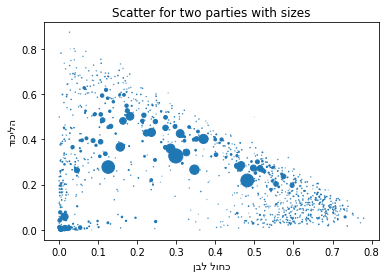

In [11]:
size_scatter_parties(df_2020_raw, "פה", "מחל")

**There is a negative correlation between the two parties. It can be seen that in the large cities the percentage distribution between the parties is relatively equal, and the further away to the edges you can see more small cities with a tendency to vote for only one of the parties.**

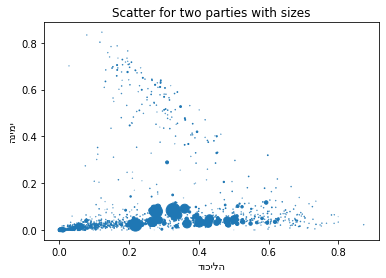

In [12]:
size_scatter_parties(df_2020_raw, "מחל", "טב")

**There is a low correlation between these parties.
The nature of voters for these parties is relatively similar, so it can be seen that in the big cities there is a greater concentration of voters for the big party - the 'הליכוד' and especially in the small cities you can see a broader vote for the small party among them - 'ימינה'.**

# **Q2.**

**A. Computing and Plotting the Correlation Matrix:**

**Computing votes share only for parties above a certain threshold, and extracting these parties:**

In [13]:
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

top_parties = parties_votes_percents(df_2020, 0.0325)  # finding the top 8 parties
par_names = top_parties.keys()

**Creating a Dataframe for the top 8 parties:**

In [14]:
top_par_df = df_2020_raw[par_names]                                   # dataframe for the top 8 parties
top_par_df.columns = top_par_df.columns.to_series().map(party_names)  # changing the colnames to parties names

votes_per_city = df_2020_raw['כשרים']
top_par_df = top_par_df.div(votes_per_city, axis = 0)                 # calculating voting percents

**Computing the correlation matrix:**

In [15]:
corr_mat_par = top_par_df.corr().round(3)
corr_mat_par

,הליכוד,כחול לבן,הרשימה המשותפת,שס,יהדות התורה,העבודה גשר מרצ,ישראל ביתנו,ימינה
הליכוד,1.000,-0.363,-0.407,0.499,-0.036,-0.480,0.097,0.106
כחול לבן,-0.363,1.000,-0.429,-0.440,-0.276,0.668,0.140,-0.438
הרשימה המשותפת,-0.407,-0.429,1.000,-0.176,-0.092,-0.256,-0.171,-0.198
שס,0.499,-0.440,-0.176,1.000,0.338,-0.375,-0.058,0.011
יהדות התורה,-0.036,-0.276,-0.092,0.338,1.000,-0.206,-0.078,0.095
העבודה גשר מרצ,-0.480,0.668,-0.256,-0.375,-0.206,1.000,0.016,-0.361
ישראל ביתנו,0.097,0.140,-0.171,-0.058,-0.078,0.016,1.000,-0.181
ימינה,0.106,-0.438,-0.198,0.011,0.095,-0.361,-0.181,1.000


**A function that creates the heatmap:**

In [16]:
def heatmap_corr(corr_mat, names):
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('Blues'))
    n = corr_mat.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    #ax.set_xticklabels(rev_names)
    #ax.set_yticklabels(rev_names)
    if (list(corr_mat.index))[-1] == 'הרשימה המשותפת':
       ax.set_title('Party Pearson correlation heat map - Parties orderd by political agenda')
       ax.set_xticklabels(['הנימי','דוכילה','סש','הרותה תודהי','ונתיב לארשי', 'ןבל לוחכ','צרמ רשג הדובעה', 'תפתושמה המישרה'])
       ax.set_yticklabels(['הנימי','דוכילה','סש','הרותה תודהי','ונתיב לארשי', 'ןבל לוחכ','צרמ רשג הדובעה', 'תפתושמה המישרה'])
    else:
        ax.set_title('Party Pearson correlation heat map - Parties orderd by size')
        ax.set_xticklabels(['דוכילה','ןבל לוחכ','תפתושמה המישרה', 'סש','הרותה תודהי','ונתיב לארשי','צרמ רשג הדובעה','הנימי'])
        ax.set_yticklabels(['דוכילה','ןבל לוחכ','תפתושמה המישרה', 'סש','הרותה תודהי' ,'ונתיב לארשי','צרמ רשג הדובעה','הנימי'])

    ax.set_title("Parties pairwise correlations")
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) #  **cbar_kw)
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")

**Heatmap of the parties ordered by size:**

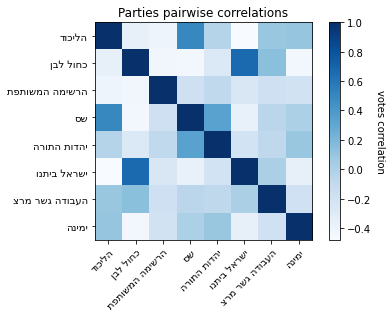

In [17]:
heatmap_corr(corr_mat_par, list(corr_mat_par.columns))

**There is no particular pattern of correlations between the parties according to their size. There are some connections between certain parties but not something consistent.**

**B. Heatmap of the parties - ordered by political agenda**

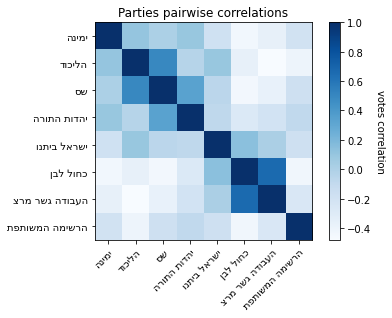

In [18]:
# changing the columns order by the political agenda
df_political = copy.deepcopy(top_par_df)
df_political = pd.DataFrame({"ימינה": df_political["ימינה"],"הליכוד": df_political["הליכוד"],"שס": df_political["שס"],"יהדות התורה": df_political["יהדות התורה"],"ישראל ביתנו": df_political["ישראל ביתנו"],"כחול לבן": df_political["כחול לבן"],"העבודה גשר מרצ": df_political["העבודה גשר מרצ"],"הרשימה המשותפת": df_political["הרשימה המשותפת"]})
corr_mat_pol = df_political.corr().round(3)
heatmap_corr(corr_mat_pol,list(corr_mat_pol))

**In this order, the map of Israel's blocks can be clearly seen.**
**In the corner is the 'הרשימה המשותפת' that is not coordinated with any other party. Two relatively dark squares of the right block and the left block can be identified. In the middle is 'ישראל ביתנו', which according to the correlation coefficients is not in any of the blocks.**

# **Q3.**

**A. Fixed number of votes:**

**Distribution of all data in relation 'בעלי זכות בחירה'/ 'כשרים' :**

In [19]:
votes_ratio = df_2020_raw['כשרים'].div(df_2020_raw['בזב'])

fixed_votes = pd.DataFrame(copy.deepcopy(df_2020))
fixed_votes = fixed_votes.div(votes_ratio,axis=0)

**Calculating the fixed voting percents and the actual voting percents, and extracting the 8 top parties for the Barplot**

In [20]:
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

fixed_total = parties_votes_percents(fixed_votes, 0.0325)  # total votes for each party
israel_total = parties_votes_percents(df_2020, 0.0325)

**A function for the comparison betweem the voting percents:**

In [21]:
def parties_bar(city1, city2):
    width = 0.3  # set column width
    n = len(city1)  # number of parties
    names = party_names.values()
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city1_bar = ax.bar(np.arange(n), list(city1), width, color='r')
    city2_bar = ax.bar(np.arange(n) + width, list(city2), width, color='b')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2020')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    ax.legend((city1_bar[0], city2_bar[0]), ('Reality Percents','Fixed Percents'))
    plt.show()

    return fig, ax

**The comparison barplot:**

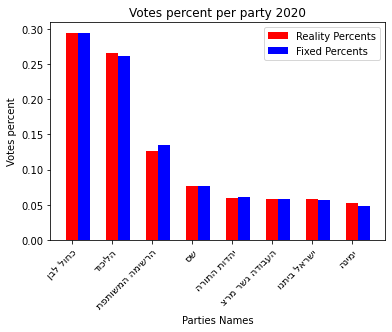

In [22]:
fig, ax = parties_bar(israel_total,fixed_total)

**The Plot shows that the "הרשימה המשותפת", which is characterized by the fact that most of its voters are from the Arab population in Israel, receives significant additional weight in the fixed percents, which corresponds to the reality in which the voting percents in Arab cities is low.
The "הרשימה המשותפת" receives an additional percentage of votes (and thus probably seats) at the expense of parties such as "הליכוד" and "ימינה" which have votes from cities with high voting percents.**

**B.**

**Import the Ballots data:**

In [23]:
df_2020_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_ballots = df_2020_ballots_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020_ballots = df_2020_ballots[df_2020_ballots.columns[9:]] # removing "metadata" columns
df_2020_ballots = df_2020_ballots.drop(['זץ'],axis =1)
df_2020_ballots.head()

,אמת,ג,ודעם,ז,זך,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,2,0,112,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0,0,0,2
אבו גווייעד שבט,6,0,235,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,2,0
אבו גווייעד שבט,5,0,207,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,2,1,0,0,0,0,0,0
אבו גוש,15,1,229,0,0,0,0,0,1,0,0,1,0,0,0,32,0,0,0,0,0,11,0,0,0,0,0,0,2
אבו גוש,6,0,330,0,0,0,0,0,2,0,0,0,0,0,2,23,0,0,0,0,0,18,0,0,0,0,0,1,0


 **Applying the same comparison we made to the cities also to the ballots:**

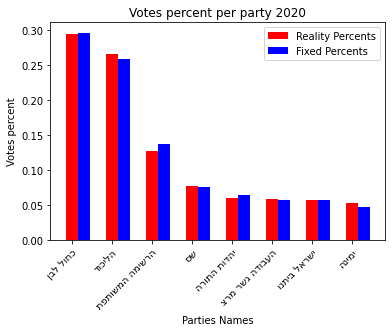

In [24]:
votes_ratio_ballots = df_2020_ballots_raw['כשרים'].div(df_2020_ballots_raw['בזב'])

fixed_votes_b = pd.DataFrame(copy.deepcopy(df_2020_ballots))
fixed_votes_b = fixed_votes_b.div(votes_ratio_ballots,axis=0)

fixed_total_b = parties_votes_percents(fixed_votes_b, 0.0325)
israel_total_b = parties_votes_percents(df_2020_ballots, 0.0325)


fig, ax = parties_bar(israel_total_b,fixed_total_b)

**The conclusions drawn from this plot are identical to those of the previous plot, except that now the change in the percentage of votes in Arab citis is even more significant, as is the case for the "יהדות התורה" party, which in the previous plot seemed small and insignificant.**

**It can be seen that in the two tests there are minor differences between the corrected percentages and the actual percentages.
In conclusion, we can't say that if there were 100% of voting the elections results would be significantly different.**